In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential, model_from_json

In [4]:
from tensorflow import keras
label = keras.models.load_model('models/Label.h5')
gen = keras.models.load_model('models/gen.h5')


In [5]:
classes=['Rock',      'Ice',   'Poison',   'Flying',
         'Dragon',  'Psychic',   'Ground',    'Fairy',   'Normal',     'Fire',
          'Water',    'Ghost', 'Electric',      'Bug',    'Steel',     'Dark',
          'Grass', 'Fighting']

In [6]:
gen.summary()

Model: "GEN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115200)            11635200  
                                                                 
 batch_normalization (BatchN  (None, 115200)           460800    
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 115200)            0         
                                                                 
 reshape (Reshape)           (None, 15, 15, 512)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 30, 30, 256)      2097408   
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024    

1/1 [==============================] - 0s 83ms/step
(120, 120, 3)
1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.13351518e-04 5.44776500e-04 1.60590947e-01 1.99820171e-03
 4.70077881e-04 4.23765887e-05 1.01032754e-06 9.53923091e-02
 1.25816595e-02 3.00304946e-02 3.40002647e-04 4.71852303e-01
 1.18402622e-05 1.64039060e-01 1.14653922e-04 5.85937127e-02
 6.77718956e-04 2.30559078e-03]
Ghost (0.472)
Bug (0.164)


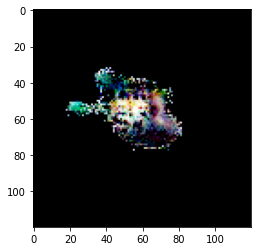

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

LATENT_DIM=100
random_noise = tf.random.normal([1,LATENT_DIM])
# for i in range(10):
img=gen.predict(random_noise)
img=img.reshape(120,120,3)
classes = np.array(classes)
print(img.shape)
proba = label.predict(img.reshape(1,120,120,3))
print(proba[0])
top_2 = np.argsort(proba[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.3})".format(proba[0][top_2[i]]))
plt.imshow(img)